<a href="https://colab.research.google.com/github/Christinathattil/AML/blob/Main/AML_Lab3_LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [9]:
df=pd.read_csv('/content/Program_3a_Dataset.csv')
df.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,56,technician,married,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

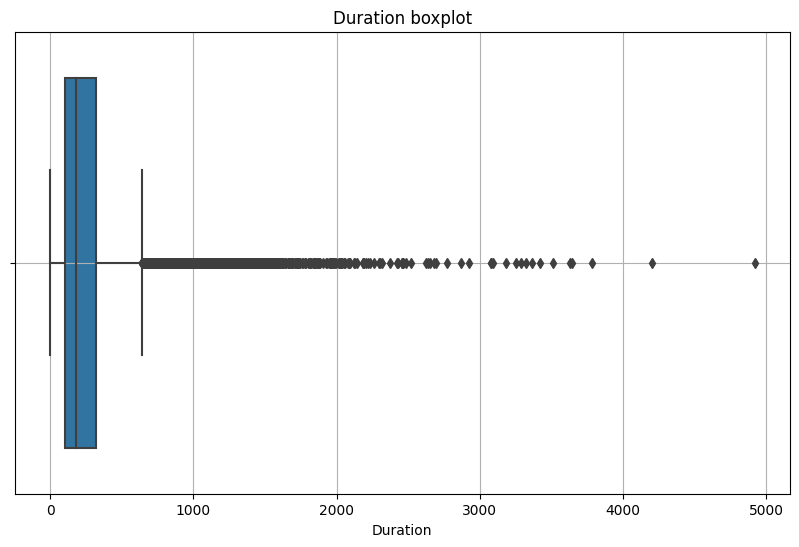

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['duration'])
plt.xlabel("Duration")
plt.title('Duration boxplot')
plt.grid(True)
plt.show()

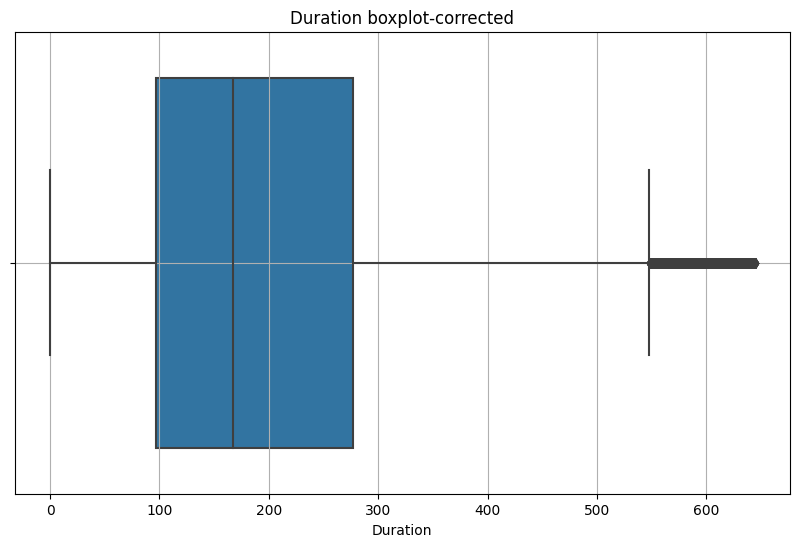

In [12]:
Q1=df['duration'].quantile(0.25)
Q3=df['duration'].quantile(0.75)

IQR=Q3-Q1

df= df[(df['duration'] >= Q1 - IQR*1.5) & (df['duration'] <= Q3 + IQR*1.5)]

#Creating a boxplot without outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['duration'])
plt.xlabel("Duration")
plt.title('Duration boxplot-corrected')
plt.grid(True)
plt.show()

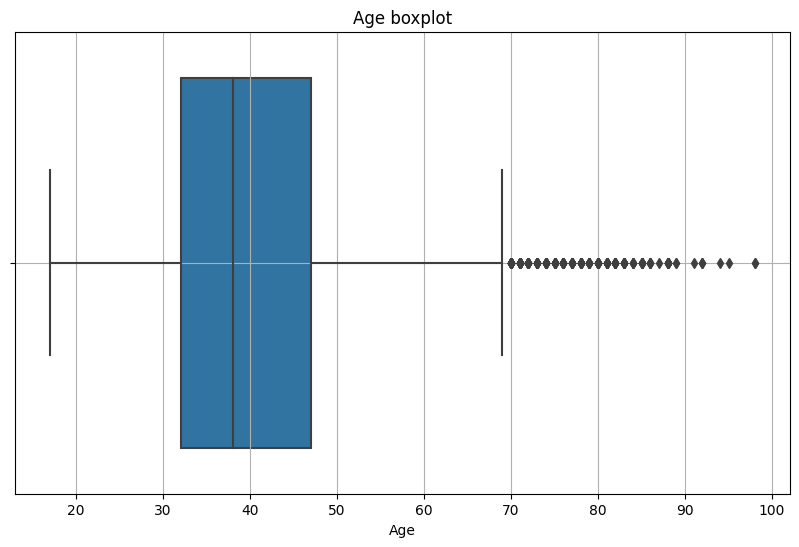

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['age'])
plt.xlabel("Age")
plt.title('Age boxplot')
plt.grid(True)
plt.show()

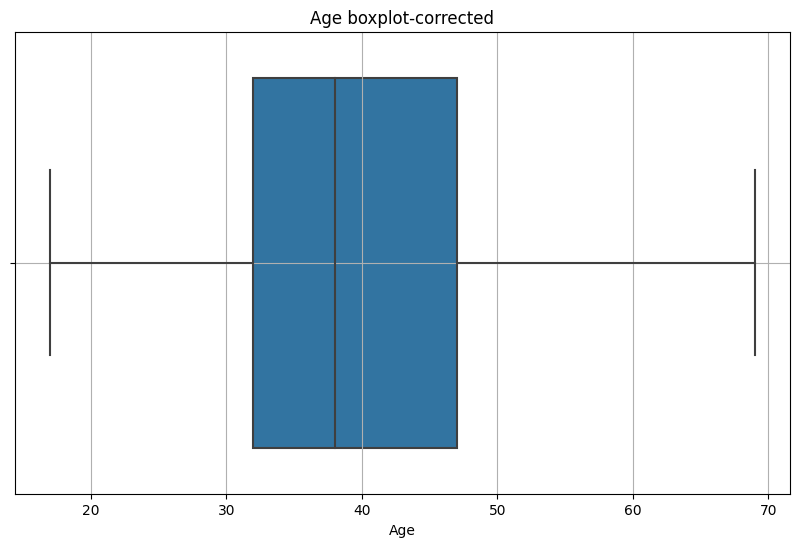

In [14]:
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)

IQR=Q3-Q1

df=df[(df['age'] >= Q1 - 1.5*IQR) & (df['age'] <= Q3 + 1.5*IQR)]

plt.figure(figsize=(10,6))
sns.boxplot(x=df['age'])
plt.xlabel("Age")
plt.title('Age boxplot-corrected')
plt.grid(True)
plt.show()

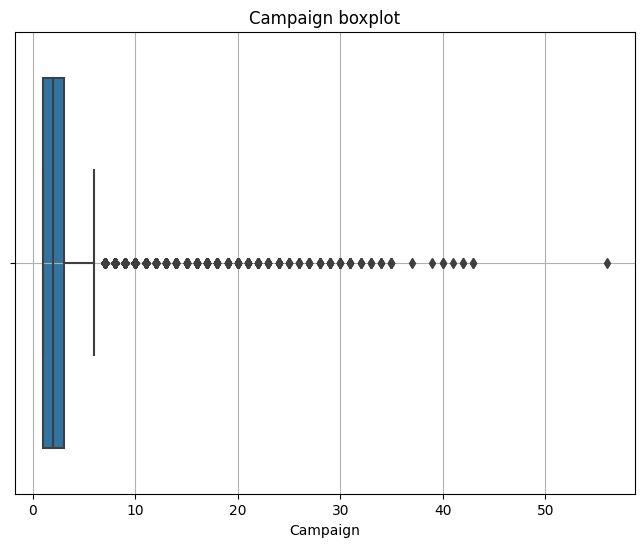

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['campaign'])
plt.xlabel("Campaign")
plt.title('Campaign boxplot')
plt.grid(True)
plt.show()

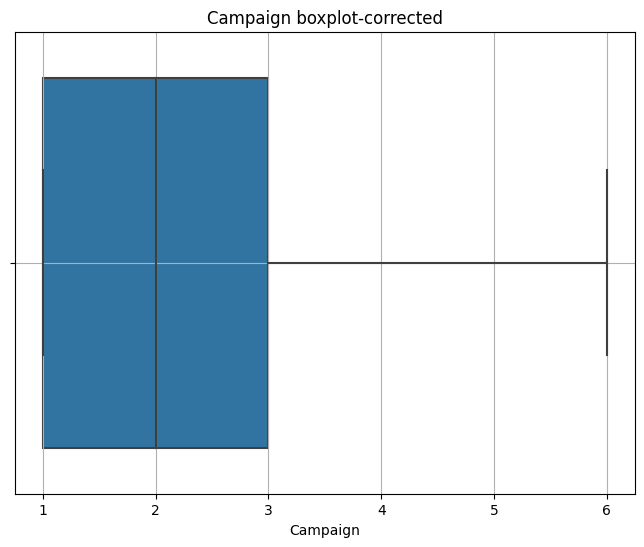

In [16]:
Q1=df['campaign'].quantile(0.25)
Q3=df['campaign'].quantile(0.75)

IQR=Q3-Q1

df=df[(df['campaign'] >= Q1 - 1.5*IQR) & (df['campaign'] <= Q3 + 1.5*IQR)]

plt.figure(figsize=(8,6))
sns.boxplot(x=df['campaign'])
plt.xlabel("Campaign")
plt.title('Campaign boxplot-corrected')
plt.grid(True)
plt.show()

In [17]:
label_encoder=LabelEncoder()
df['y']=label_encoder.fit_transform(df['y'])

In [26]:
X=df[['duration','age','campaign']]
y=df['y']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

model=LogisticRegression()

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

# Evaluate the model
print("Accuracy= ")
print(accuracy_score(y_test,y_pred))

print("Classification report")
print(classification_report(y_test,y_pred))

print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))


Accuracy= 
0.9172685489166119
Classification report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9779
           1       0.00      0.00      0.00       882

    accuracy                           0.92     10661
   macro avg       0.46      0.50      0.48     10661
weighted avg       0.84      0.92      0.88     10661

Confusion matrix
[[9779    0]
 [ 882    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Inferences**
The information you've provided includes an accuracy score of approximately 91.73%. Let's break down the classification report and the confusion matrix:

### Classification Report:
- **Precision**:
  - For class 0 (the first class): 92% precision - When the model predicts class 0, it's correct 92% of the time.
  - For class 1 (the second class): 0% precision - Unfortunately, the model didn't correctly predict any instances of class 1.

- **Recall** (Sensitivity):
  - For class 0: 100% recall - It correctly identified all instances of class 0.
  - For class 1: 0% recall - It missed predicting any instances of class 1.

- **F1-score**:
  - For class 0: 96% - This is a combined score of precision and recall for class 0.
  - For class 1: 0% - The F1-score for class 1 is also 0 due to the absence of correct predictions for this class.

- **Support**:
  - Class 0 has 9779 instances in the dataset.
  - Class 1 has 882 instances.

### Confusion Matrix:

- The top-left value (9779) represents the number of instances correctly predicted as class 0.
- The bottom-right value (0) shows the number of instances correctly predicted as class 1. However, in this case, the model didn't correctly predict any instances of class 1.
- The top-right and bottom-left values (0) indicate instances that were misclassified; in this case, the model didn't predict any instances of class 1.

### Summary:
- The model performs well in identifying class 0, achieving high precision and recall with a perfect score.
- However, for class 1, the model doesn't perform well at all. It fails to predict any instances of class 1, resulting in 0% recall and precision.
- The overall accuracy of the model might be high (around 91.73%), but it's heavily influenced by the dominance of class 0 in the dataset. The model's inability to predict class 1 suggests a significant issue with its performance on this particular class.